In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
X_train = np.load('np/xgb/example/X_train.npy')
X_validation = np.load('np/xgb/example/X_validation.npy')
Y_train = np.load('np/xgb/example/Y_train.npy')
Y_validation = np.load('np/xgb/example/Y_validation.npy')
X_test = np.load('np/xgb/example/X_test.npy')
Y_test = np.load('np/xgb/example/Y_test.npy')

In [3]:
feature_names = ['min_y', 'max_y', 'mean_y', 'std_y', 'skew_y', 'kurtosis_y', '-1_Weekly_Sales', '-1_IsHoliday', '-1_Temperature', '-1_Fuel_Price', '-1_MarkDown1', '-1_MarkDown2', '-1_MarkDown3', '-1_MarkDown4', '-1_MarkDown5', '-1_CPI', '-1_Unemployment', '-1_Size', '-1_promotion', '-1_Month', '-1_Year', '-1_day', '-1_dayofweek', '-1_y', '-2_Weekly_Sales', '-2_IsHoliday', '-2_Temperature', '-2_Fuel_Price', '-2_MarkDown1', '-2_MarkDown2', '-2_MarkDown3', '-2_MarkDown4', '-2_MarkDown5', '-2_CPI', '-2_Unemployment', '-2_Size', '-2_promotion', '-2_Month', '-2_Year', '-2_day', '-2_dayofweek', '-2_y', '-3_Weekly_Sales', '-3_IsHoliday', '-3_Temperature', '-3_Fuel_Price', '-3_MarkDown1', '-3_MarkDown2', '-3_MarkDown3', '-3_MarkDown4', '-3_MarkDown5', '-3_CPI', '-3_Unemployment', '-3_Size', '-3_promotion', '-3_Month', '-3_Year', '-3_day', '-3_dayofweek', '-3_y']


In [10]:
X_train

array([[[1.63106668e+04, 1.94971084e+04, 1.75141010e+04, ...,
         7.00000000e+00, 4.00000000e+00, 1.81179649e+04],
        [1.62468823e+04, 1.81179649e+04, 1.68028304e+04, ...,
         2.40000000e+01, 4.00000000e+00, 1.68421834e+04],
        [1.62468823e+04, 1.68421834e+04, 1.65313522e+04, ...,
         1.00000000e+01, 4.00000000e+00, 1.65327275e+04],
        ...,
        [2.00000000e+01, 2.40000000e+03, 4.53125000e+02, ...,
         9.00000000e+00, 4.00000000e+00, 4.00000000e+01],
        [2.00000000e+01, 5.10000000e+02, 1.33750000e+02, ...,
         2.60000000e+01, 4.00000000e+00, 1.20000000e+02],
        [1.00000000e-02, 5.10000000e+02, 1.73751250e+02, ...,
         2.40000000e+01, 4.00000000e+00, 5.00000000e+01]]])

In [ ]:
# test if it's linear of not

In [30]:
# feature selection method
# filter method
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold

In [17]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_var_t = sel.fit_transform(X_train[0])

In [19]:
X_train_var_t.shape

(4711, 45)

In [28]:
removed_features_var = [i for i in range(len(sel.variances_)) if sel.variances_[i] < 0.001]
[feature_names[i] for i in removed_features_var]
# thus proves that Size, promotion, dayofweek won't change 1,2,3week eariler; simple but effective.

['-1_Size',
 '-1_promotion',
 '-1_dayofweek',
 '-2_Size',
 '-2_promotion',
 '-2_dayofweek',
 '-3_Size',
 '-3_promotion',
 '-3_dayofweek']

In [114]:
f_test, f_p_val = f_regression(X_train[0], Y_train[0])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeW

In [108]:
#-2y most important features
f_test = [abs(i) for i in f_test]
f_test /= np.max([i for i in f_test if ~np.isnan(i)])

In [117]:
np.min([i for i in f_test if ~np.isnan(i)])

-1.1781917025159862e+18

In [112]:
f_dict = {}
for i, v in enumerate(f_test):
    if not np.isnan(v):
        f_dict[feature_names[i]] = v
f_dict

{'min_y': 1.603864735799899e-13,
 'max_y': 9.588435395097303e-14,
 'mean_y': 2.3031790778575085e-13,
 'std_y': 4.501202597854641e-16,
 'skew_y': 1.470644777766364e-17,
 'kurtosis_y': 2.925030464058151e-19,
 '-1_Weekly_Sales': 1.9613696270801765e-13,
 '-1_IsHoliday': 3.4870249210132325e-19,
 '-1_Temperature': 8.023390760639986e-19,
 '-1_Fuel_Price': 5.532419117507275e-19,
 '-1_MarkDown1': 7.544214667244614e-19,
 '-1_MarkDown2': 3.266813804897327e-19,
 '-1_MarkDown3': 7.811624010209326e-21,
 '-1_MarkDown4': 7.430890399242912e-20,
 '-1_MarkDown5': 2.166721223952004e-18,
 '-1_CPI': 1.2750850431853271e-18,
 '-1_Unemployment': 3.2122011650095986e-19,
 '-1_Month': 4.645312077696464e-19,
 '-1_Year': 6.558888110013528e-19,
 '-1_day': 2.466476573223215e-20,
 '-1_y': 1.0,
 '-2_Weekly_Sales': 1.2209574446545715e-13,
 '-2_IsHoliday': 1.207389845548228e-19,
 '-2_Temperature': 9.76374103124014e-19,
 '-2_Fuel_Price': 5.274114623485632e-19,
 '-2_MarkDown1': 1.0339010931921541e-18,
 '-2_MarkDown2': 2.14

In [113]:
top_f_features = sorted(f_dict.items(), key=lambda x:-x[1])
top_f_features

[('-1_y', 1.0),
 ('-2_y', 7.354927972906827e-13),
 ('-3_y', 2.7647770921880715e-13),
 ('mean_y', 2.3031790778575085e-13),
 ('-1_Weekly_Sales', 1.9613696270801765e-13),
 ('min_y', 1.603864735799899e-13),
 ('-2_Weekly_Sales', 1.2209574446545715e-13),
 ('-3_Weekly_Sales', 1.2115964334796504e-13),
 ('max_y', 9.588435395097303e-14),
 ('std_y', 4.501202597854641e-16),
 ('skew_y', 1.470644777766364e-17),
 ('-3_MarkDown5', 2.6136120354604837e-18),
 ('-1_MarkDown5', 2.166721223952004e-18),
 ('-2_MarkDown5', 1.6441702279302936e-18),
 ('-3_CPI', 1.4206440772602868e-18),
 ('-2_CPI', 1.352980344305934e-18),
 ('-1_CPI', 1.2750850431853271e-18),
 ('-2_MarkDown4', 1.1591065306382584e-18),
 ('-2_MarkDown1', 1.0339010931921541e-18),
 ('-3_Year', 1.0033089536495534e-18),
 ('-2_Temperature', 9.76374103124014e-19),
 ('-3_Temperature', 8.595322879684044e-19),
 ('-3_MarkDown1', 8.474289522855393e-19),
 ('-1_Temperature', 8.023390760639986e-19),
 ('-2_Year', 7.74212302023319e-19),
 ('-1_MarkDown1', 7.54421466

In [59]:
df = pd.DataFrame(X_train[0], columns=feature_names)
df['target'] = Y_train[0]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


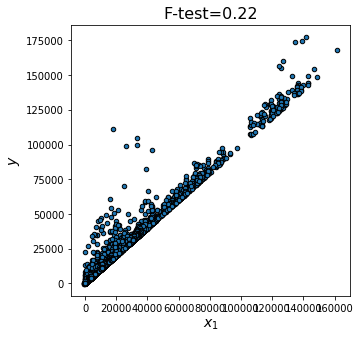

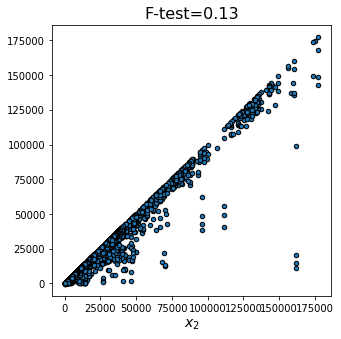

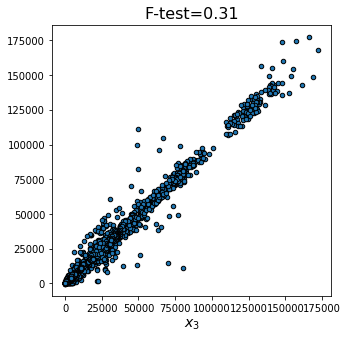

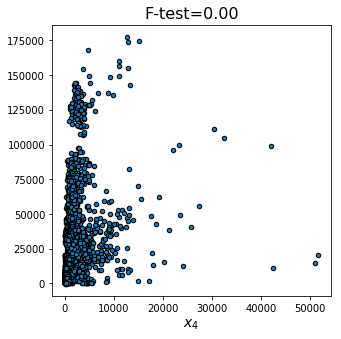

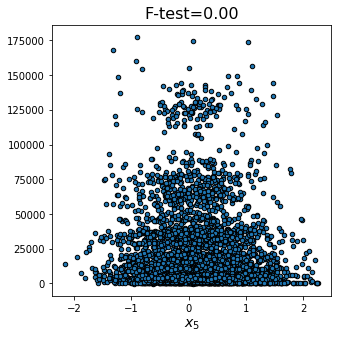

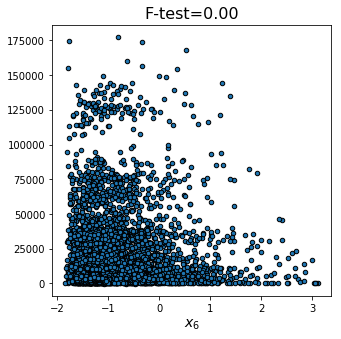

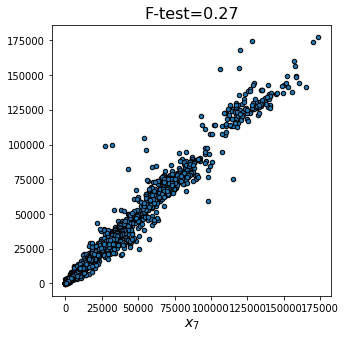

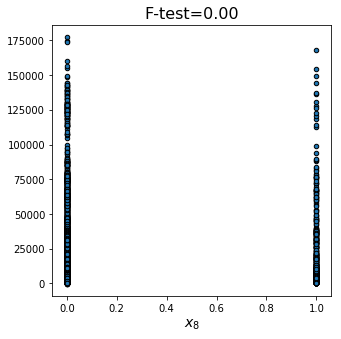

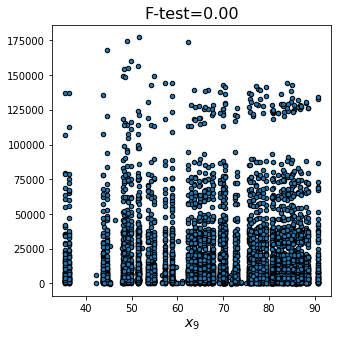

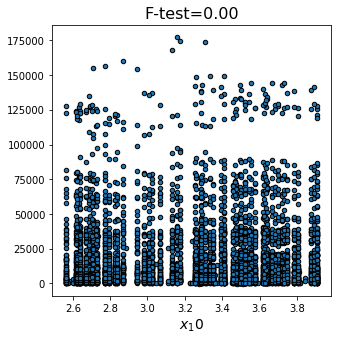

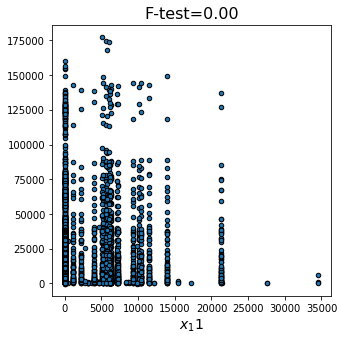

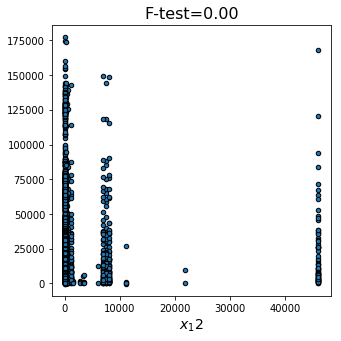

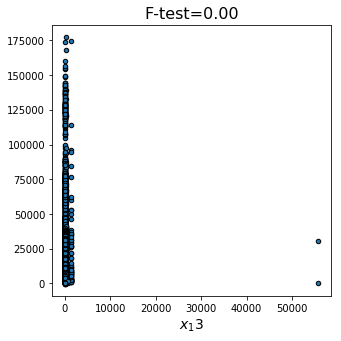

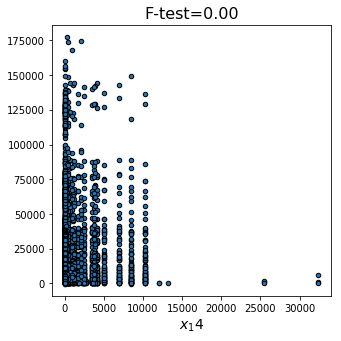

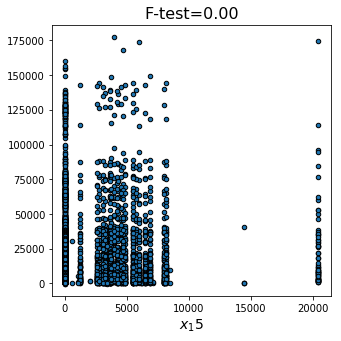

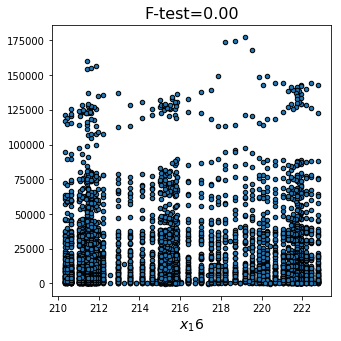

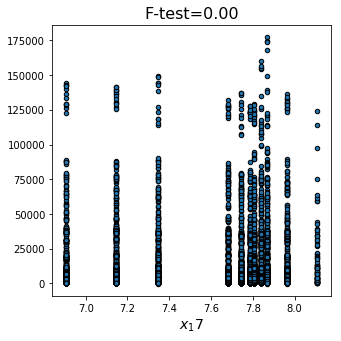

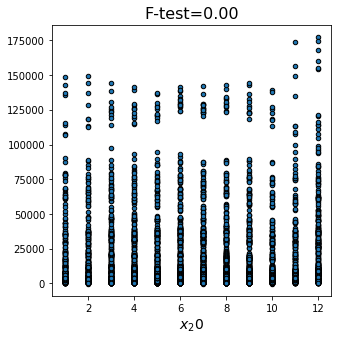

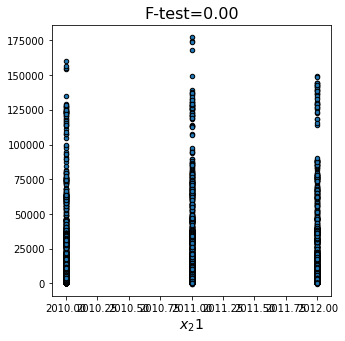

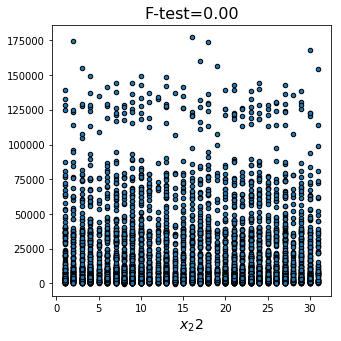

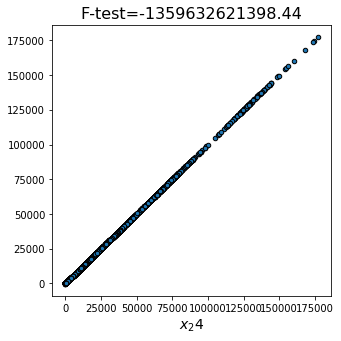

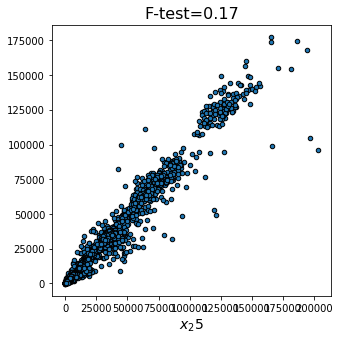

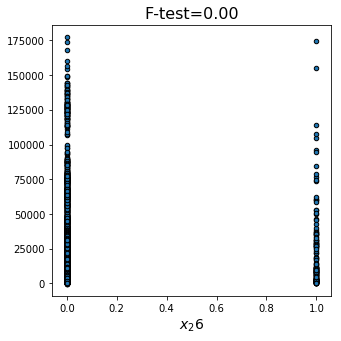

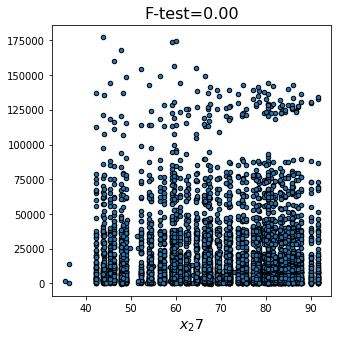

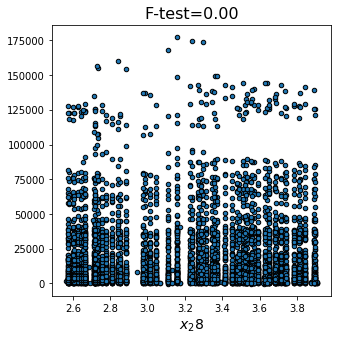

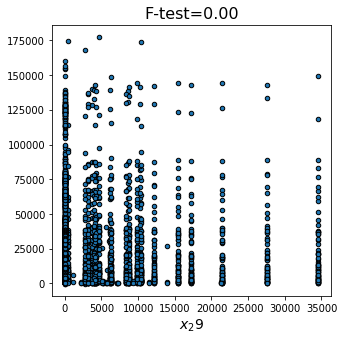

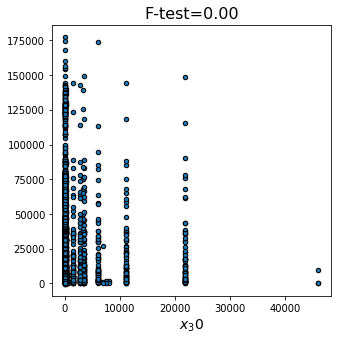

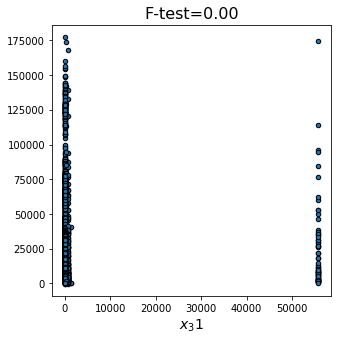

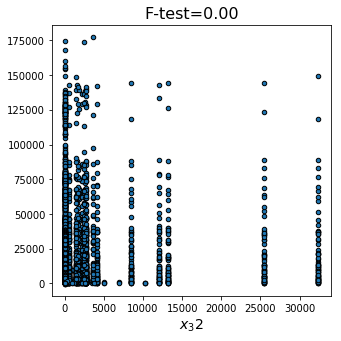

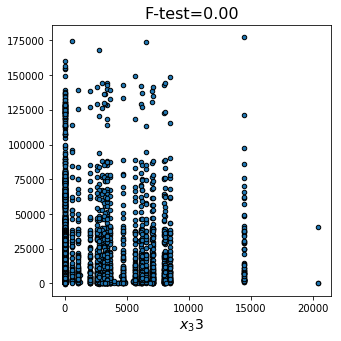

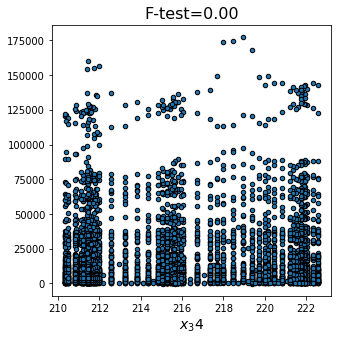

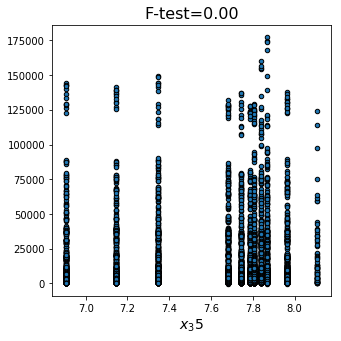

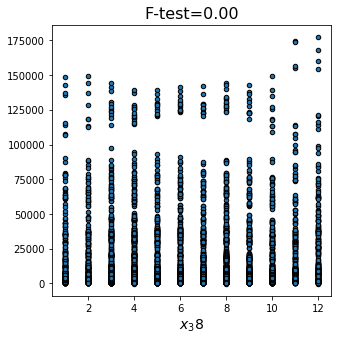

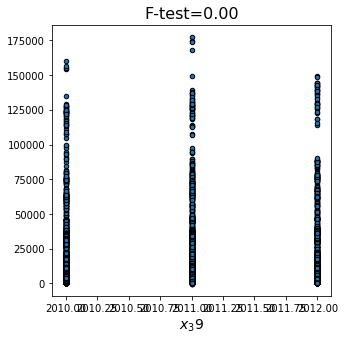

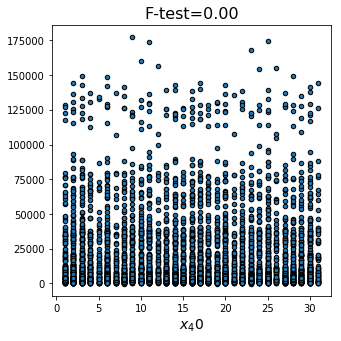

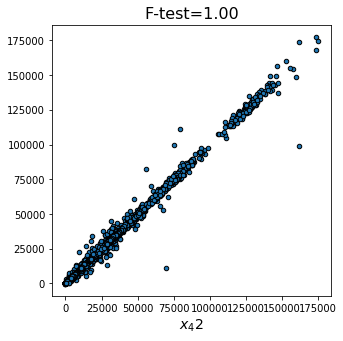

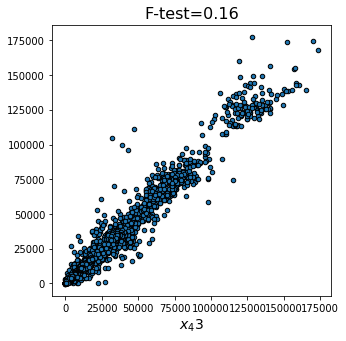

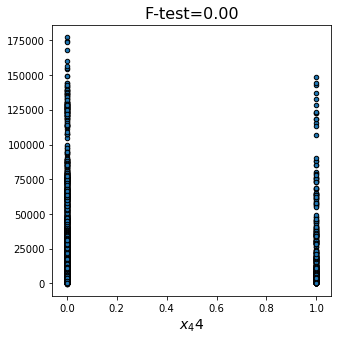

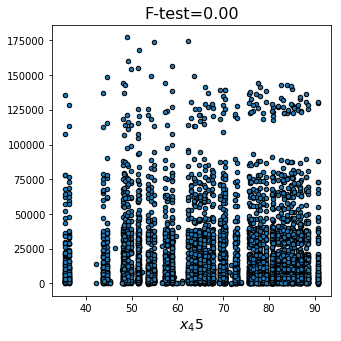

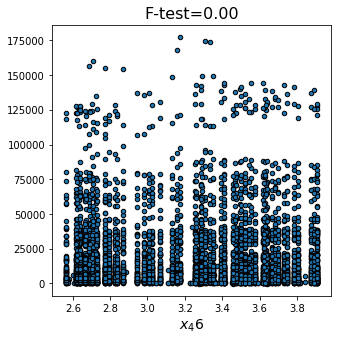

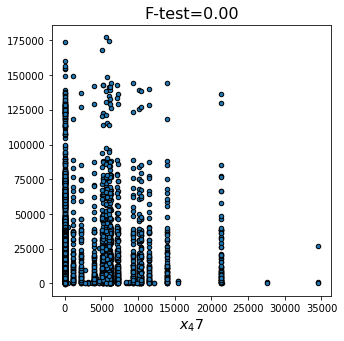

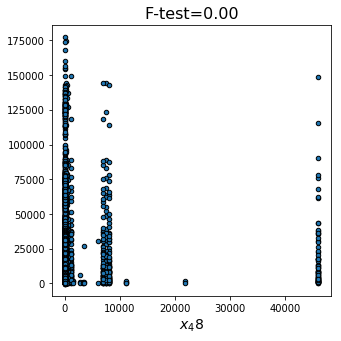

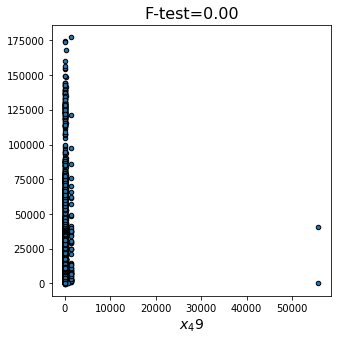

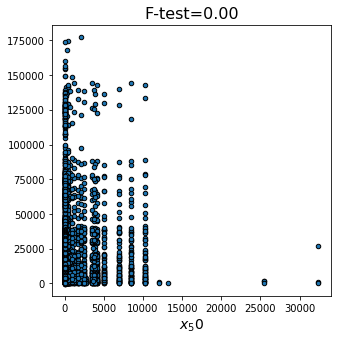

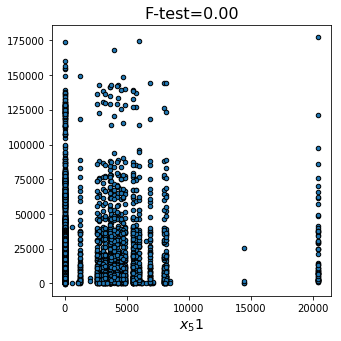

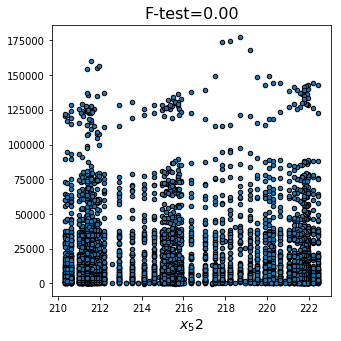

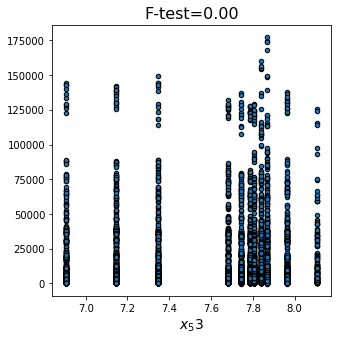

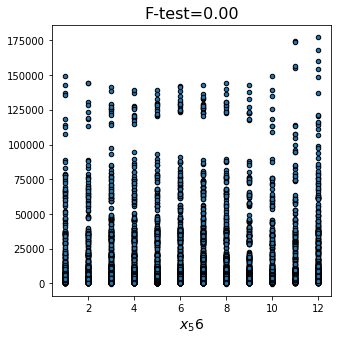

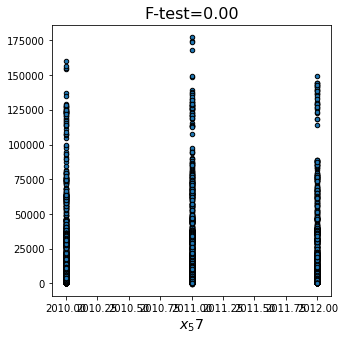

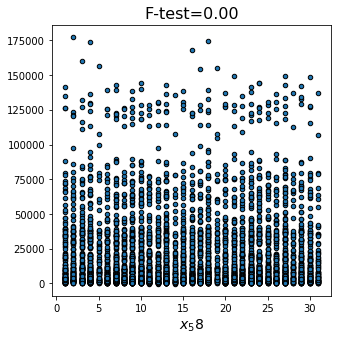

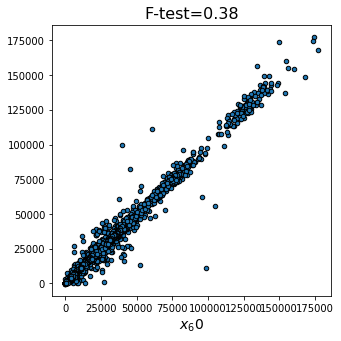

In [79]:
def plot_f():
    for i in range(60):
        if not np.isnan(f_test[i]):
    #         plt.subplot(1, 3, i + 1)
            plt.figure(figsize=(5, 5))
            plt.scatter(X_train[0][:,i], Y_train[0], edgecolor='black', s=20)
            plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
            if i == 0:
                plt.ylabel("$y$", fontsize=14)
            plt.title(str(f_test[i]),
                      fontsize=16)
    plt.show()

In [102]:
mi = mutual_info_regression(X_train[0], Y_train[0])

In [104]:
mi /= np.max(mi)

In [106]:
mi_dict = {}
for i, v in enumerate(mi):
    if not np.isnan(v):
        mi_dict[feature_names[i]] = v
top_mi_features = sorted(mi_dict.items(), key=lambda x:-x[1])
top_mi_features

[('-1_y', 1.0),
 ('-2_y', 0.44100237971565065),
 ('min_y', 0.43606304634995063),
 ('max_y', 0.4104849317574278),
 ('-1_Weekly_Sales', 0.3547657650817006),
 ('-3_y', 0.35070747974358213),
 ('mean_y', 0.32966134191864),
 ('-2_Weekly_Sales', 0.3242931370810341),
 ('-3_Weekly_Sales', 0.28222143376572917),
 ('std_y', 0.07076818797623656),
 ('-3_Unemployment', 0.007551243981527673),
 ('-1_Unemployment', 0.006703810550680324),
 ('-2_Unemployment', 0.006415369857667436),
 ('-2_Month', 0.005484270490246587),
 ('-1_Month', 0.004505099692699322),
 ('-3_Month', 0.003722006376499989),
 ('skew_y', 0.0025256819050400187),
 ('-3_Year', 0.001838917671466202),
 ('-1_Year', 0.0014284275446775209),
 ('-2_Year', 0.001403942715391546),
 ('kurtosis_y', 0.0009852301651679246),
 ('-2_IsHoliday', 0.0001224151850410026),
 ('-3_dayofweek', 7.299722163317722e-05),
 ('-1_promotion', 4.685406308463362e-05),
 ('-1_dayofweek', 4.1524001338328195e-05),
 ('-3_promotion', 9.339269655703418e-06),
 ('-1_IsHoliday', 0.0),
 

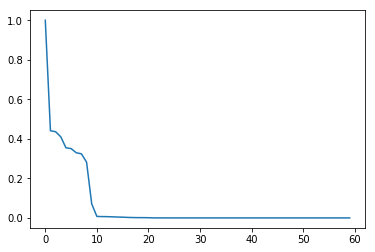

In [121]:
plt.plot([i[1] for i in top_mi_features])

In [123]:
from sklearn.linear_model import SGDRegressor

In [131]:
svr = SGDRegressor(loss='squared_loss', penalty='l1', alpha=0.0001, l1_ratio=0.15, 
                   fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, 
                   epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, 
                   power_t=0.25, early_stopping=False, validation_fraction=0.1, 
                   n_iter_no_change=5, warm_start=False, average=False)

In [132]:
svr.fit(X_train[0], Y_train[0])

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='l1', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [144]:
svr_dict = {}
s_e /= np.max(svr.coef_)
for i, v in enumerate(s_e):
    svr_dict[feature_names[i]] = abs(v)
                                    
svr_top_features = sorted(svr_dict.items(), key=lambda x:-x[1])


In [145]:
svr_top_features

[('-2_y', 1.0),
 ('-1_Weekly_Sales', 0.9315251797506954),
 ('min_y', 0.8318965371617238),
 ('-3_y', 0.6876367868370654),
 ('-3_Weekly_Sales', 0.48678507499903695),
 ('-2_MarkDown1', 0.44364683089100176),
 ('-1_MarkDown4', 0.37961757892130243),
 ('-1_MarkDown1', 0.34493091923919983),
 ('mean_y', 0.335753299996046),
 ('-1_MarkDown2', 0.2976193363397509),
 ('-2_MarkDown3', 0.2840176332432841),
 ('max_y', 0.27851783246465966),
 ('-2_Weekly_Sales', 0.25743109527019287),
 ('-3_MarkDown4', 0.2548064969275559),
 ('std_y', 0.24613819057056058),
 ('-2_MarkDown5', 0.24564308569152743),
 ('-3_MarkDown3', 0.1669312487826877),
 ('-3_MarkDown2', 0.14520905402504541),
 ('-3_MarkDown5', 0.05438086080547061),
 ('-2_MarkDown4', 0.052986611036915335),
 ('-1_y', 0.046092123354132236),
 ('-3_MarkDown1', 0.03673716428500337),
 ('-1_day', 0.031053785829826867),
 ('-3_Temperature', 0.026854579507982212),
 ('-2_Temperature', 0.024144353388725826),
 ('-1_Temperature', 0.017266225455255788),
 ('-3_Month', 0.01007

In [148]:
print('F-statistic selection....')
print(top_f_features[:10])
print('\n MI selection....')
print(top_mi_features[:10])
print('\n svr selection....')
print(svr_top_features[:10])

F-statistic selection....
[('-1_y', 1.0), ('-2_y', 7.354927972906827e-13), ('-3_y', 2.7647770921880715e-13), ('mean_y', 2.3031790778575085e-13), ('-1_Weekly_Sales', 1.9613696270801765e-13), ('min_y', 1.603864735799899e-13), ('-2_Weekly_Sales', 1.2209574446545715e-13), ('-3_Weekly_Sales', 1.2115964334796504e-13), ('max_y', 9.588435395097303e-14), ('std_y', 4.501202597854641e-16)]

 MI selection....
[('-1_y', 1.0), ('-2_y', 0.44100237971565065), ('min_y', 0.43606304634995063), ('max_y', 0.4104849317574278), ('-1_Weekly_Sales', 0.3547657650817006), ('-3_y', 0.35070747974358213), ('mean_y', 0.32966134191864), ('-2_Weekly_Sales', 0.3242931370810341), ('-3_Weekly_Sales', 0.28222143376572917), ('std_y', 0.07076818797623656)]

 svr selection....
[('-2_y', 1.0), ('-1_Weekly_Sales', 0.9315251797506954), ('min_y', 0.8318965371617238), ('-3_y', 0.6876367868370654), ('-3_Weekly_Sales', 0.48678507499903695), ('-2_MarkDown1', 0.44364683089100176), ('-1_MarkDown4', 0.37961757892130243), ('-1_MarkDown1

In [158]:
corr = df.corr()

In [152]:
type(corr)

pandas.core.frame.DataFrame

In [160]:
corr.iloc[6]

min_y              0.983172
max_y              0.968024
mean_y             0.983970
std_y              0.287756
skew_y            -0.060539
kurtosis_y        -0.008834
-1_Weekly_Sales    1.000000
-1_IsHoliday       0.009551
-1_Temperature    -0.004916
-1_Fuel_Price      0.019987
-1_MarkDown1       0.021386
-1_MarkDown2      -0.001831
-1_MarkDown3      -0.002980
-1_MarkDown4       0.002511
-1_MarkDown5       0.014946
-1_CPI             0.021872
-1_Unemployment   -0.015471
-1_Size                 NaN
-1_promotion            NaN
-1_Month           0.005461
-1_Year            0.017938
-1_day            -0.034103
-1_dayofweek            NaN
-1_y               0.989964
-2_Weekly_Sales    0.969297
-2_IsHoliday      -0.009057
-2_Temperature    -0.007023
-2_Fuel_Price      0.019964
-2_MarkDown1       0.026700
-2_MarkDown2      -0.006669
                     ...   
-2_MarkDown4       0.027813
-2_MarkDown5       0.024141
-2_CPI             0.022380
-2_Unemployment   -0.015055
-2_Size             

In [159]:
corr

,min_y,max_y,mean_y,std_y,skew_y,kurtosis_y,-1_Weekly_Sales,-1_IsHoliday,-1_Temperature,-1_Fuel_Price,...,-3_CPI,-3_Unemployment,-3_Size,-3_promotion,-3_Month,-3_Year,-3_day,-3_dayofweek,-3_y,target
min_y,1.000000,0.968652,0.993929,0.229841,-0.076306,-0.010106,0.983172,0.001754,0.010404,0.018297,...,0.023012,-0.020635,NaN,NaN,-0.002142,0.020411,-0.002929,NaN,0.989832,0.987768
max_y,0.968652,1.000000,0.989006,0.462914,-0.052081,-0.008835,0.968024,0.016460,-0.041053,0.006523,...,0.012441,-0.005907,NaN,NaN,0.000285,0.013584,0.005008,NaN,0.984098,0.979788
mean_y,0.993929,0.989006,1.000000,0.330849,-0.080077,-0.015201,0.983970,0.007220,-0.012290,0.014032,...,0.019236,-0.014034,NaN,NaN,-0.000076,0.017761,0.001065,NaN,0.996302,0.991435
std_y,0.229841,0.462914,0.330849,1.000000,0.063384,-0.029130,0.287756,0.054036,-0.196779,-0.041052,...,-0.033023,0.050912,NaN,NaN,0.004717,-0.018496,0.028330,NaN,0.325620,0.318152
skew_y,-0.076306,-0.052081,-0.080077,0.063384,1.000000,0.315840,-0.060539,0.030517,-0.050987,-0.048758,...,-0.014673,0.002371,NaN,NaN,0.010010,-0.012240,-0.001093,NaN,-0.087123,-0.060548
kurtosis_y,-0.010106,-0.008835,-0.015201,-0.029130,0.315840,1.000000,-0.008834,0.010533,-0.010647,-0.032088,...,-0.012756,0.009013,NaN,NaN,0.051805,-0.027994,-0.017595,NaN,-0.016583,-0.008554
-1_Weekly_Sales,0.983172,0.968024,0.983970,0.287756,-0.060539,-0.008834,1.000000,0.009551,-0.004916,0.019987,...,0.022835,-0.015704,NaN,NaN,-0.004257,0.020917,0.012438,NaN,0.982991,0.989964
-1_IsHoliday,0.001754,0.016460,0.007220,0.054036,0.030517,0.010533,0.009551,1.000000,-0.216842,-0.040208,...,0.019901,-0.006430,NaN,NaN,0.067754,0.025767,0.307401,NaN,0.009957,0.009340
-1_Temperature,0.010404,-0.041053,-0.012290,-0.196779,-0.050987,-0.010647,-0.004916,-0.216842,1.000000,0.147868,...,0.082920,-0.203633,NaN,NaN,-0.082800,0.083379,-0.122360,NaN,-0.012844,-0.014167
-1_Fuel_Price,0.018297,0.006523,0.014032,-0.041052,-0.048758,-0.032088,0.019987,-0.040208,0.147868,1.000000,...,0.731352,-0.477774,NaN,NaN,-0.279983,0.805975,-0.037923,NaN,0.013769,0.011764
